In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('spambase/spambase.data', header=None)

In [3]:
data = data.fillna(0)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# Part a

In [6]:
print('There are a total of {} data points with {} features'.format(data.shape[0],data.shape[1]-1))

There are a total of 4601 data points with 57 features


In [5]:
print('There are {} spam and {} regular emails'.format(len(data[data[57]==1]),len(data[data[57]==0])))

There are 1813 spam and 2788 regular emails


# Part b

In [23]:
# Fit a CART model
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values


clf = clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X, Y)

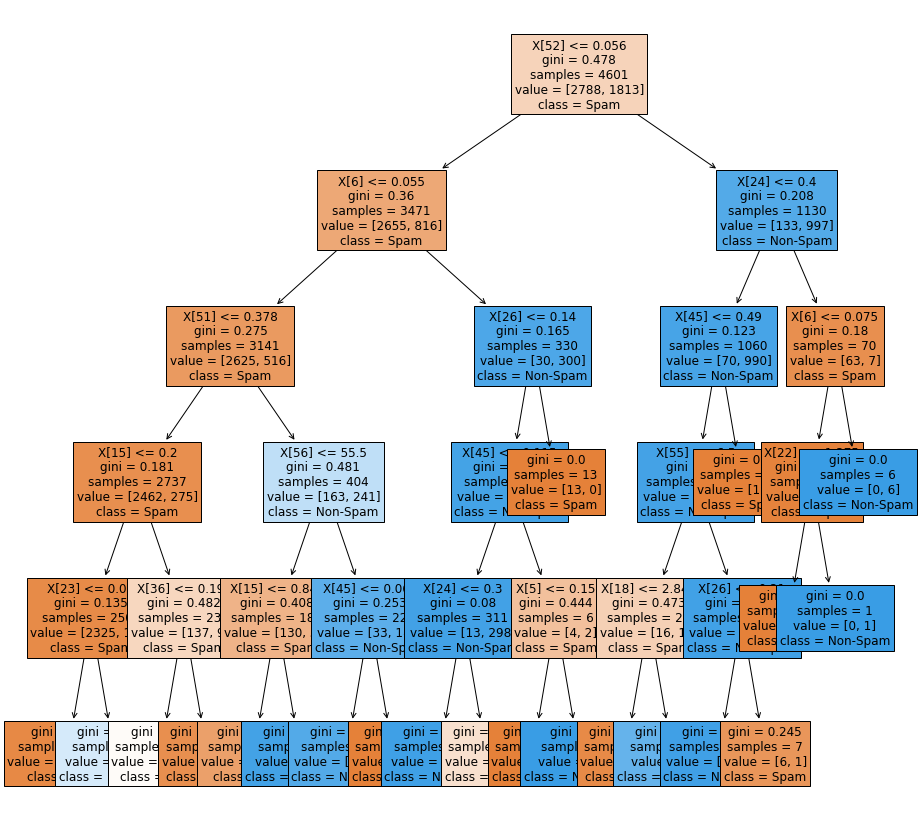

In [28]:
fig, ax = plt.subplots(figsize=(15, 15))
tree.plot_tree(clf,class_names = ['Spam','Non-Spam'], fontsize=12, filled=True) 
plt.show()

# Part c

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [35]:
# Fit a CART and Random Forest model for multiple tree sizes
treesize = []
carty = []
rfy = []


for i in range(2,100):
    
    treesize.append(i)
    
    clf1 = tree.DecisionTreeClassifier(max_depth=i)
    clf1.fit(xtrain, ytrain)
    prediction = clf1.predict(xtest)
    cartauc = roc_auc_score(ytest, prediction)
    
    carty.append(cartauc)
    
    clf2 = RandomForestClassifier(max_depth=i)
    clf2.fit(xtrain, ytrain)
    prediction = clf2.predict(xtest)
    rfauc = roc_auc_score(ytest, prediction)
    
    rfy.append(rfauc)
    

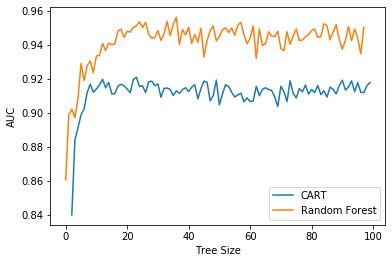

In [42]:
plt.plot(treesize, carty, rfy)
plt.xlabel('Tree Size')
plt.ylabel('AUC')
plt.legend(['CART','Random Forest'])